**<p>Disciplina:** Métodos Numéricos</p>
**<p>Semestre:** 2020.2</p>
**<p>Aluno:** Jardel Brandon de Araujo Regis</p>
**<p>Mátricula:** 201621250014</p>
**<p>2ª Unidade:** RAÍZES E OTIMIZAÇÃO</p>

---
# <center>Exercício 2</center>
## <center>Solução de Equações não Lineares Usando Python</center>
---

In [1]:
import scipy
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpmath import *
from sympy import *
from itertools import *

In [2]:
#funções auxiliares 

erro_total = lambda valor_verdadeiro, aproximacao: valor_verdadeiro - aproximacao

erro_relativo_fracionario = lambda valor_verdadeiro, aproximacao: (valor_verdadeiro - aproximacao) / valor_verdadeiro

erro_relativo_percentual = lambda valor_verdadeiro, aproximacao: (valor_verdadeiro - aproximacao) / valor_verdadeiro * 100

def imprimir_tabela(dados, index = None):
    pd.set_option("display.precision", 20)
    df = pd.DataFrame(dados, index)
    print(df.to_string())

### **Problema 1**

$$ f (x) = −0.5x^2 + 2.5x + 4.5 $$

#### a)

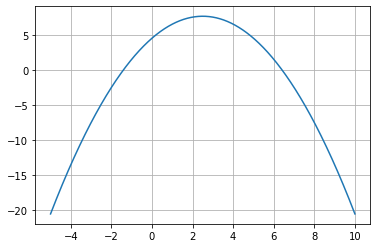

In [3]:
f = lambda x: -0.5 * x ** 2 + 2.5 * x + 4.5
x = np.linspace(-5, 10,10000)
plt.plot(x,f(x))
plt.grid(True)


#### b)

In [4]:
raizes_quadratica = lambda a, b, c: ((-b + sqrt((b * b) - (4 * a * c))) / (2 * a), (-b - sqrt((b * b) - (4 * a * c))) / (2 * a))
a = -0.5
b = 2.5
c = 4.5

print(raizes_quadratica(a, b, c))
PRIMEIRA_RAIZ, SEGUNDA_RAIZ = raizes_quadratica(a, b, c)

(-1.40512483795333, 6.40512483795333)


#### c)

In [5]:
def bissecao(funcao, x_inicial, x_final, ITERACOES = np.inf, TOLERANCIA = np.NINF):
    ponto_medio = (x_inicial + x_final) / 2
    if abs(x_final - x_inicial) < TOLERANCIA or funcao(ponto_medio) == 0 or bissecao.counter == ITERACOES:
            bissecao.counter = 0
            return [ponto_medio]
    else: bissecao.counter += 1
    
    if funcao(ponto_medio) * funcao(x_inicial) < 0: 
        return [ponto_medio] + bissecao(funcao, x_inicial, ponto_medio, ITERACOES, TOLERANCIA)
    else: 
        return [ponto_medio] + bissecao(funcao, ponto_medio, x_final, ITERACOES, TOLERANCIA)

bissecao.counter = 0

In [6]:
x_i = 5
x_u = 10
iteracoes = 3

valores = bissecao(f, x_i, x_u, iteracoes)

erros_totais = [erro_total(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_fracionarios = [erro_relativo_fracionario(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_percentuais = [erro_relativo_percentual(valor, SEGUNDA_RAIZ) for valor in valores]

tabela = {'Raiz maior': SEGUNDA_RAIZ,
          'valor_i':        valores,
          'Erro total':          erros_totais,
          'Erro Fracionario':   erros_relativos_fracionarios,
          'Erro Percentual':     erros_relativos_percentuais}

imprimir_tabela(tabela)

         Raiz maior  valor_i          Erro total     Erro Fracionario    Erro Percentual
0  6.40512483795333   7.5000    1.09487516204667    0.145983354939556   14.5983354939556
1  6.40512483795333   6.2500  -0.155124837953327  -0.0248199740725323  -2.48199740725323
2  6.40512483795333   6.8750   0.469875162046673   0.0683454781158797   6.83454781158797
3  6.40512483795333   6.5625   0.157375162046673   0.0239809770737787   2.39809770737787


### **Problema 2**

$$
f(x) = -2X^6 - 1.5x^4 + 10x + 20
$$

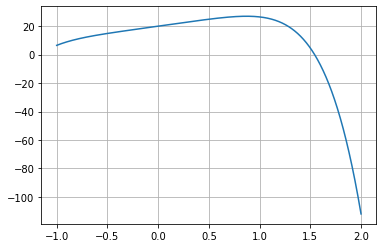

In [7]:
f = lambda x: -2 * x ** 6 - 1.5 * x ** 4 + 10 * x + 20
x = np.linspace(-1, 2,10000)
plt.plot(x,f(x))
plt.grid(True)

-12*x**5 - 6.0*x**3 + 10


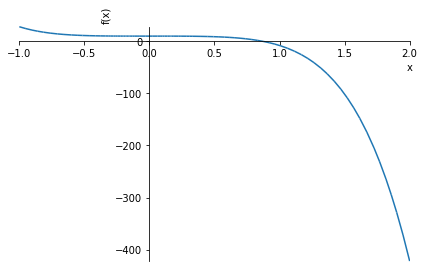

In [8]:
x = symbols('x')
f = lambda x: -2 * x ** 6 - 1.5 * x ** 4 + 10 * x + 20
derivada = diff(f(x))
print(derivada)
plot(derivada, (x, -1, 2))

In [9]:
x_i = 0
x_u = 1

f = lambdify(x, derivada, 'numpy')
valores = bissecao(f, x_i, x_u, iteracoes, 0.05)
print(valores)

[0.5, 0.75, 0.875, 0.8125]


### **Problema 3**

In [10]:
def falsa_posicao(funcao, x_inicial, x_final, ITERACOES=np.NINF, TOLERANCIA=np.NINF):
    funcao_ponto_inicial = funcao(x_inicial)
    estimativas = list()
      
    while falsa_posicao.counter != ITERACOES:
        estimativas.append((x_inicial * funcao(x_final) - x_final * funcao(x_inicial)) / (funcao(x_final) - funcao(x_inicial)))
        funcao_ponto_estimado = funcao(estimativas[falsa_posicao.counter])
        if funcao_ponto_estimado == 0 and abs(funcao_ponto_estimado) < TOLERANCIA : 
            falsa_posicao.counter = 0
            return estimativas

        if(funcao_ponto_inicial * funcao_ponto_estimado > 0):
            x_inicial = estimativas[falsa_posicao.counter]
        else:
            x_final = estimativas[falsa_posicao.counter]
        falsa_posicao.counter += 1
    falsa_posicao.counter = 0
    return estimativas

falsa_posicao.counter = 0

### Testando o método da falsa posição para o problema 1 letra c)

In [11]:
f = lambda x: -0.5 * x ** 2 + 2.5 * x + 4.5

x_i = 5
x_u = 10
iteracoes = 3
tolerancia = np.inf

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

erros_totais = [erro_total(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_fracionarios = [erro_relativo_fracionario(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_percentuais = [erro_relativo_percentual(valor, SEGUNDA_RAIZ) for valor in valores]

tabela = {'Raiz maior': SEGUNDA_RAIZ,
          'valor_i':        valores,
          'Erro total':          erros_totais,
          'Erro Fracionario':   erros_relativos_fracionarios,
          'Erro Percentual':     erros_relativos_percentuais}

imprimir_tabela(tabela)

[5.9, 6.238532110091742, 6.351836734693878]
         Raiz maior                 valor_i           Erro total      Erro Fracionario     Erro Percentual
0  6.40512483795333  5.90000000000000035527   -0.505124837953327   -0.0856143793141231   -8.56143793141231
1  6.40512483795333  6.23853211009174213331   -0.166592727861585   -0.0267038343189893   -2.67038343189893
2  6.40512483795333  6.35183673469387777288  -0.0532881032594492  -0.00838940065452066  -0.838940065452066


Como pode-se observar, o metódo da falsa posição retornou um valor mais aproximado do real, com 1 repetição a menos, de acordo com a tabela de erros apresentadas

### Testando o método da falsa posição para o problema 2

In [12]:
f = lambda x: -12 * x ** 5 - 6.0 * x ** 3 + 10

x_i = 0
x_u = 1
iteracoes = np.inf
tolerancia = 0.05

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

[0.5555555555555556, 0.7823501604757047, 0.8500227697940591, 0.8665353042945969, 0.8703139832359249, 0.8711651152704326, 0.8713561353559485, 0.8713989710953532, 0.8714085751329356, 0.871410728328975, 0.8714112110645322, 0.8714113192911553, 0.8714113435549503, 0.8714113489947548, 0.871411350214328, 0.8714113504877493, 0.8714113505490488, 0.8714113505627918, 0.871411350565873, 0.8714113505665637, 0.8714113505667186, 0.8714113505667533, 0.8714113505667611, 0.8714113505667628, 0.8714113505667632, 0.8714113505667633]


Como é possível observar, para atingir uma tolerância de erro de 5%, foram necessárias somente duas iterações,
de tal forma que esse método para essa equação foi melhor que o método da bisseção

### Testando o método da falsa posição para o exemplo 2 da nota de aula

$$
e^x = x + 2
$$

In [13]:
def f(x): return np.exp(x)-x-2
np.sign(f(-2)*f(0))

-1.0

In [14]:
raiz = opt.root_scalar(f,method='bisect',bracket=[-2,0])
raiz

      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: -1.8414056604360667

In [15]:
x_i = -2
x_u = 0

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

[-1.7615941559557646, -1.8402501723136198, -1.841389489184834, -1.8414054342273545, -1.8414056572726762, -1.8414056603926976, -1.8414056604363414, -1.841405660436952, -1.8414056604369604, -1.8414056604369609]


### Testando o método da falsa posição para o exemplo 3 da nota de aula

$$
\sqrt{x} = \cos(x)
$$

In [16]:
def f(x): return np.cos(x) - np.sqrt(x)

In [17]:
vp = opt.root_scalar(f,method='bisect',bracket=[0,1], xtol=1e-40).root
r = []
e = []

for i in range(1,7):
    x = opt.root_scalar(f,method='bisect',bracket=[0,1], maxiter=i).root
    r.append(x)
    e.append(np.around(np.absolute(x - vp) * 100 / 2, decimals=2))
    
import pandas as pd
pd.DataFrame({'Iterações': range(0,6), 'Raiz': r, 'Erro':e}).set_index('Iterações')

,Raiz,Erro
Iterações,,
0,0.500000,7.08999999999999985789
1,0.500000,7.08999999999999985789
2,0.625000,0.83999999999999996891
3,0.625000,0.83999999999999996891
4,0.625000,0.83999999999999996891
5,0.640625,0.05000000000000000278


In [18]:
x_i = 0
x_u = 1
iteracoes = 7
tolerancia = np.inf

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

erros_totais = [erro_total(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_fracionarios = [erro_relativo_fracionario(valor, SEGUNDA_RAIZ) for valor in valores]
erros_relativos_percentuais = [erro_relativo_percentual(valor, SEGUNDA_RAIZ) for valor in valores]

tabela = {'Raiz maior': SEGUNDA_RAIZ,
          'valor_i':        valores,
          'Erro total':          erros_totais,
          'Erro Fracionario':   erros_relativos_fracionarios,
          'Erro Percentual':     erros_relativos_percentuais}

imprimir_tabela(tabela)

[0.6850733573260451, 0.6503949801283647, 0.6435565520339048, 0.6421098575945017, 0.6417994835090949, 0.641732697569524, 0.6417183174755584]
         Raiz maior                 valor_i         Erro total   Erro Fracionario    Erro Percentual
0  6.40512483795333  0.68507335732604512923  -5.72005148062728  -8.34954595658718  -834.954595658718
1  6.40512483795333  0.65039498012836471919  -5.75472985782496  -8.84805392669111  -884.805392669111
2  6.40512483795333  0.64355655203390482733  -5.76156828591942  -8.95269928914636  -895.269928914636
3  6.40512483795333  0.64210985759450167620  -5.76301498035883  -8.97512304506346  -897.512304506346
4  6.40512483795333  0.64179948350909488131  -5.76332535444423  -8.97994701231722  -897.994701231722
5  6.40512483795333  0.64173269756952400211  -5.76339214038380  -8.98098563811985  -898.098563811985
6  6.40512483795333  0.64171831747555840852  -5.76340652047777  -8.98120929935475  -898.120929935475


### Testando o método da falsa posição para o exemplo 4 da nota de aula

$$
f(x) = 5 sin(x^2) - exp \left(\frac{x}{10}\right)
$$

In [19]:
def f(x): return 5 * np.sin(x ** 2) - np.exp(x/10)

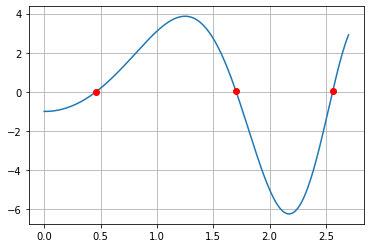

In [20]:
x = np.linspace(0,2.7,200)
plt.plot(x,f(x))
plt.plot([0.46, 1.7, 2.56], [f(0.46), f(1.7), f(2.56)], 'o', color='r')
plt.grid(True)

In [21]:
np.sign(f(0.4) * f(0.5))
np.sign(f(1.7) * f(1.8))
np.sign(f(2.5) * f(2.6))

-1.0

In [22]:
print('1ª raiz positiva: ',opt.root_scalar(f,method='bisect', bracket=[0.4,0.5],xtol=1e-5).root)
print('2ª raiz positiva: ',opt.root_scalar(f,method='bisect', bracket=[1.7,1.8],xtol=1e-5).root)
print('3ª raiz positiva: ',opt.root_scalar(f,method='bisect', bracket=[2.5,2.6],xtol=1e-5).root)

1ª raiz positiva:  0.459307861328125
2ª raiz positiva:  1.703570556640625
3ª raiz positiva:  2.558209228515625


In [23]:
x_i = 0.4
x_u = 0.5
tolerancia = 1e-5

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

x_i = 1.7
x_u = 1.8

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

x_i = 2.5
x_u = 2.6

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
print(valores)

[0.45679945731437466, 0.4592075958565898, 0.45930181111377394, 0.4593054847551961, 0.4593056279789401, 0.45930563356275533, 0.4593056337804496]
[1.703400048170842, 1.7035660686767091, 1.7035740592360833, 1.70357444354882, 1.7035744620320366, 1.7035744629209708, 1.703574462963723]
[2.5592348966927574, 2.5582261535765185, 2.5582128138589724, 2.558212641075543, 2.558212638838176, 2.5582126388092044, 2.558212638808829]


### Testando o método da falsa posição para o exemplo 5 da nota de aula

$$
I_d = I_R \left[exp \left(\frac{v_d}{v_d} \right) - 1 \right]
$$

In [24]:
def fa(vd, vs = 30, R = 1e+3): return 1e-12 * np.exp(((1.60217653e-19 * vd) / (4.1419509e-25)) -1) - ((vs - vd)/(R))

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


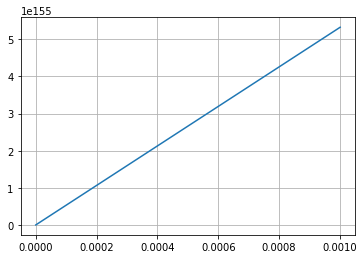

In [25]:
x = np.linspace(0,1,1000)
plt.plot(x,fa(x))
plt.grid(True)

In [26]:
opt.root_scalar(fa,method='bisect', bracket=[0,0.1]).root

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


6.495182024082167e-05

In [27]:
def f(vd, vs, R): return 1e-12 * np.exp(((1.60217653e-19 * vd) / (4.1419509e-25))-1) - ((vs - vd)/(R))

In [28]:
vs = 300e-3
R = 1e+3
opt.root_scalar(f, args=(vs,R), method='bisect', bracket=[0,0.1]).root

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


5.304607184370981e-05

In [29]:
vs = np.array([30, 3, 3, 300e-3, -300e-3, -30, -30])
R = np.array([1e+3, 1e+3, 1e+4, 1e+3, 1e+3, 1e+3, 1e+4])

In [30]:
vd = []
for i in range(len(vs)):
    Vs = vs[i]
    r = R[i]
    if Vs>0:
        a,b = 0,.1
    else:
        a,b = -32,.1
    x = opt.root_scalar(f, args=(Vs,r), method='bisect', bracket=[a,b]).root
    vd.append(x)
vd


C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


[6.495182024082167e-05,
 5.899912648601458e-05,
 5.3046482207719243e-05,
 5.304607184370981e-05,
 -0.299999999999072,
 -30.00000000000098,
 -30.00000000000098]

Text(0, 0.5, '$V_d (V)$')

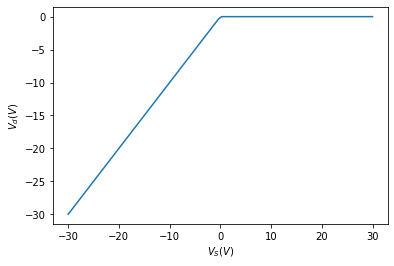

In [31]:
plt.plot(vs,vd)
plt.xlabel('$V_S (V)$')
plt.ylabel('$V_d (V)$')

In [32]:
id = (vs - vd) * 1000 / R
id

array([ 2.99999350e+01,  2.99994100e+00,  2.99994695e-01,  2.99946954e-01,
       -9.27979915e-13,  9.80548975e-13,  9.80548975e-14])

Text(0, 0.5, '$I_d (mA)$')

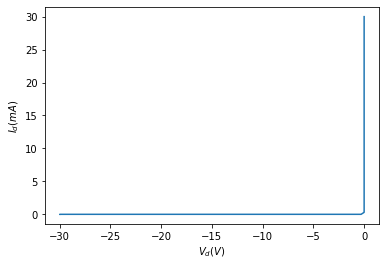

In [33]:
plt.plot(vd,id)
plt.xlabel('$V_d (V)$')
plt.ylabel('$I_d (mA)$')

### **Problema 4**

$$
f(x) = 2sin(\sqrt{x}) - x)
$$

In [34]:
f = lambda x: 2 * np.sin(np.sqrt(x)) - x

In [35]:
raiz = opt.fixed_point(f, 0.5, xtol=1e-2, method="iteration")
raiz

0.768018090595916

### **Problema 5**

$$
f(x) = 2x^3 - 11.7x^2 + 17.7x - 5
$$

#### a)

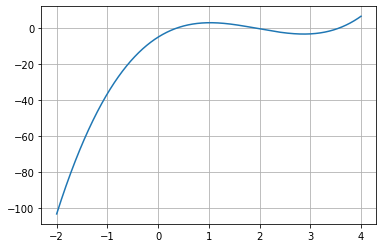

In [36]:
f = lambda x: 2 * x ** 3 - 11.7 * x ** 2 + 17.7 * x - 5
x = np.linspace(-2, 4,10000)
plt.plot(x,f(x))
plt.grid(True)

#### b)

In [37]:
# maxiter=3 -> Error
g = lambda x: (2 * x ** 3 - 11.7 * x ** 2 - 5) / -17.7
raiz = opt.fixed_point(g, x0=3)
raiz

array(3.56316082)

#### c)

In [38]:
x = symbols('x')
f = lambda x: 2 * x ** 3 - 11.7 * x ** 2 + 17.7 * x - 5
derivada = diff(f(x))
f_1 = lambdify(x, derivada, 'numpy')
opt.root_scalar(f, fprime=f_1, x0=3, method='newton', maxiter=3, xtol=1e-10)

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264

#### d)

In [39]:
opt.root_scalar(f, x0=3, x1=4, xtol = 1e-10, maxiter=3, method='secant')

      converged: False
           flag: 'convergence error'
 function_calls: 5
     iterations: 3
           root: 3.5862753847117346

### **Problema 6**

#### a)

$$
f_{1}(x)=2 x^{4}+4 x^{3}+3 x^{2}-10 x-15, \operatorname{com} x^{*} \in[0,3]
$$

In [40]:
f = lambda x: 2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 10 * x - 15

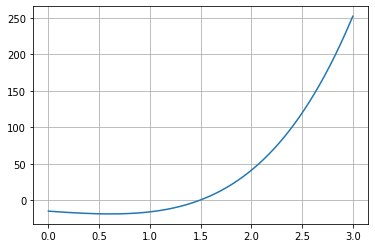

In [41]:
x = np.linspace(0, 3,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da bisseção

In [42]:
%timeit opt.root_scalar(f,method='bisect', bracket=[0,3], maxiter=200, xtol=1e-10)
opt.root_scalar(f,method='bisect', bracket=[0,3], maxiter=200, xtol=1e-10)

52.6 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783

##### Método da falsa posição

In [43]:
x_i = 0
x_u = 3
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]

1.4928787086636037

##### Método do ponto fixo

In [44]:
g = lambda x:(2 * x ** 4 + 4 * x ** 3 + 3 * x ** 2 - 15) / 10

In [45]:
%timeit opt.fixed_point(g, 3, xtol=1e-10, maxiter=200)
opt.fixed_point(g, 3, xtol=1e-10, maxiter=200)

17.7 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(1.49287871)

##### Método de Newton-Raphson

In [46]:
x = symbols('x')
derivada = diff(f(x))
f_1 = lambdify(x, derivada, 'numpy')
opt.root_scalar(f, fprime=f_1, x0=3, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.4928787086636037

In [47]:
%timeit opt.root_scalar(f, fprime=f_1, x0=3, method='newton', maxiter=200, xtol=1e-10)

346 µs ± 50.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### Método da secante

In [48]:
%timeit opt.root_scalar(f, x0=3, x1=0, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=3, x1=0, xtol = 1e-10, maxiter=200, method='secant')

500 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: -1.3003841326439196

In [49]:
%timeit opt.root_scalar(f, x0=3, x1=1, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=3, x1=1, xtol = 1e-10, maxiter=200, method='secant')

448 µs ± 21.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.4928787086636035

#### b)

$$
f_{2}(x)=(x+3)(x+1)(x-2)^{3}, \operatorname{com} x^{*} \in[0,5]
$$

In [50]:
f = lambda x: (x + 3) * (x + 1) * (x - 2) ** 3 

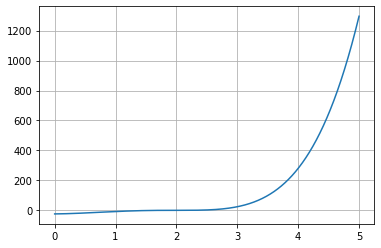

In [51]:
x = np.linspace(0, 5,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da bisseção

In [52]:
%timeit opt.root_scalar(f,method='bisect', bracket=[0,5], maxiter=200, xtol=1e-10)
opt.root_scalar(f,method='bisect', bracket=[0,5], maxiter=200, xtol=1e-10)

35 µs ± 934 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 2.0000000000436557

##### Método da falsa posição

In [53]:
x_i = 0
x_u = 5
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]


1.714409136227648

##### Método do ponto fixo

$x^5-2x^4-9x^3+22x^2+4x-24$

In [54]:
g = lambda x: (x ** 5 - 2 * x ** 4 - 9 * x ** 3 + 22 * x ** 2 - 24) / -4

In [55]:
%timeit opt.fixed_point(g, 3, xtol=1e-10, maxiter=200)
opt.fixed_point(g, 3, xtol=1e-10, maxiter=200)

364 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(-3.)

##### Método de Newton-Raphson

In [56]:
x = symbols('x')
derivada = diff(f(x))
f_1 = lambdify(x, derivada, 'numpy')
opt.root_scalar(f, fprime=f_1, x0=3, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 112
     iterations: 56
           root: 2.0000000001726277

In [57]:
%timeit opt.root_scalar(f, fprime=f_1, x0=3, method='newton', maxiter=200, xtol=1e-10)

2.37 ms ± 93.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Método da secante

In [58]:
%timeit opt.root_scalar(f, x0=5, x1=0, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=5, x1=0, xtol = 1e-10, maxiter=200, method='secant')

3.06 ms ± 73.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 79
     iterations: 78
           root: 2.0000000002448965

#### c)

$$
f_{3}(x)=5 x^{3}+x^{2}-e^{1-2 x}+\cos (x)+20, \operatorname{com} x^{*} \in[-5,5]
$$

In [59]:
f = lambda x: 5 * x ** 3 + x ** 2 - np.exp(1 - 2 * x) + np.cos(x) + 20

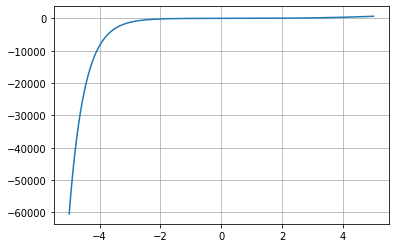

In [60]:
x = np.linspace(-5, 5,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da bisseção

In [61]:
%timeit opt.root_scalar(f,method='bisect', bracket=[-5,5], maxiter=200, xtol=1e-10)
opt.root_scalar(f,method='bisect', bracket=[-5,5], maxiter=200, xtol=1e-10)

174 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516

##### Método da falsa posição

In [62]:
x_i = -5
x_u = 5
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]

1.568769261078004

##### Método do ponto fixo

In [63]:
g = lambda x: (5 * x ** 3 - np.exp(1 - 2 * x) + np.cos(x) + 20) / -x

In [64]:
%timeit opt.fixed_point(g, -5, xtol=1e-10, maxiter=200)
opt.fixed_point(g, -5, xtol=1e-10, maxiter=200)

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


207 µs ± 6.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(-5.)

##### Método de Newton-Raphson

In [65]:
x = symbols('x')
f = lambda x: 5 * x ** 3 + x ** 2 - exp(1 - 2 * x) + cos(x) + 20
derivada = diff(f(x))

f_1 = lambdify(x, derivada, 'numpy')
f = lambda x: 5 * x ** 3 + x ** 2 - np.exp(1 - 2 * x) + np.cos(x) + 20
opt.root_scalar(f, fprime=f_1, x0=-5, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 26
     iterations: 13
           root: -0.9295604598378413

In [66]:
%timeit opt.root_scalar(f, fprime=f_1, x0=-5, method='newton', maxiter=200, xtol=1e-10)

750 µs ± 8.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### Método da secante

In [67]:
%timeit opt.root_scalar(f, x0=-5, x1=5, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=-5, x1=5, xtol = 1e-10, maxiter=200, method='secant')

1.2 ms ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 25
     iterations: 24
           root: -0.9295604598378412

#### d)

$$
f_{4}(x)=\sin (x) x+4, \operatorname{com} x^{*} \in[1,5]
$$

In [68]:
f = lambda x: np.sin(x) * x + 4

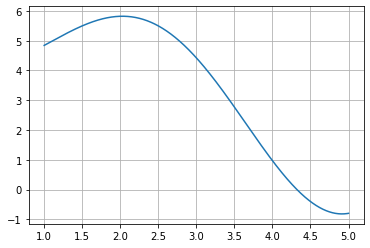

In [69]:
x = np.linspace(1, 5,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da bisseção

In [70]:
%timeit opt.root_scalar(f,method='bisect', bracket=[1,5], maxiter=200, xtol=1e-10)
opt.root_scalar(f,method='bisect', bracket=[1,5], maxiter=200, xtol=1e-10)

93 µs ± 9.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 36
           root: 4.323239543766249

##### Método da falsa posição

In [71]:
x_i = 1
x_u = 5
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]

4.323239543713714

##### Método do ponto fixo

In [72]:
g = lambda x: -4 / np.sin(x)

In [73]:
%timeit opt.fixed_point(g, 1, xtol=1e-10, maxiter=200)
opt.fixed_point(g, 1, xtol=1e-10, maxiter=200)

1.19 ms ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(-4.32323954)

##### Método de Newton-Raphson

In [74]:
x = symbols('x')
f = lambda x: sin(x) * x + 4
derivada = diff(f(x))

f_1 = lambdify(x, derivada, 'numpy')
f = lambda x: np.sin(x) * x + 4
opt.root_scalar(f, fprime=f_1, x0=-5, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: -5.461308012588998

In [75]:
%timeit opt.root_scalar(f, fprime=f_1, x0=-5, method='newton', maxiter=200, xtol=1e-10)

357 µs ± 7.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### Método da secante

In [76]:
%timeit opt.root_scalar(f, x0=5, x1=1, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=5, x1=1, xtol = 1e-10, maxiter=200, method='secant')

330 µs ± 6.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

#### e)

$$
f_{5}(x)=(x-3)^{5} \ln (x) \mid, \operatorname{com} x^{*} \in[2,5]
$$

In [77]:
f = lambda x: (x - 3) ** 5 * np.log(x)

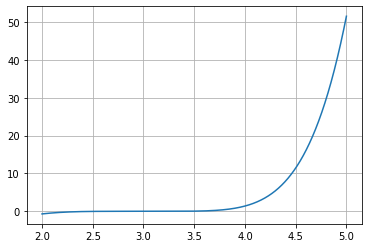

In [78]:
x = np.linspace(2, 5,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da bisseção

In [79]:
%timeit opt.root_scalar(f,method='bisect', bracket=[2,5], maxiter=200, xtol=1e-10)
opt.root_scalar(f,method='bisect', bracket=[2,5], maxiter=200, xtol=1e-10)

99.9 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 3.000000000029104

##### Método da falsa posição

In [80]:
x_i = 2
x_u = 5
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]

2.593909764205461

##### Método do ponto fixo

In [81]:
g = lambda x: np.exp((x ** 5 * np.log(x) - 15 * x ** 4 * np.log(x) + 90 * x ** 3 * np.log(x) - 270 * x ** 2 * np.log(x) + 405 * x * np.log(x)) / 243)

In [82]:
# maxiter = 200 -> Error
%timeit opt.fixed_point(g, 5, xtol=1e-10, maxiter=9000)
opt.fixed_point(g, 5, xtol=1e-10, maxiter=9000)

1.65 s ± 46.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array(3.0255312)

##### Método de Newton-Raphson

In [83]:
x = symbols('x')
f = lambda x: (x - 3) ** 5 * ln(x)
derivada = diff(f(x))

f_1 = lambdify(x, derivada, 'numpy')
f = lambda x: (x - 3) ** 5 * np.log(x)
opt.root_scalar(f, fprime=f_1, x0=2, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 194
     iterations: 97
           root: 2.99999999964898

In [84]:
%timeit opt.root_scalar(f, fprime=f_1, x0=2, method='newton', maxiter=200, xtol=1e-10)

4.93 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Método da secante

In [85]:
%timeit opt.root_scalar(f, x0=5, x1=2, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=5, x1=2, xtol = 1e-10, maxiter=200, method='secant')

6.16 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 139
     iterations: 138
           root: 2.999999999418057

#### f)

$$
f_{6}(x)=x^{10} - 1, \operatorname{com} x^{*} \in[0.8,1.2]
$$

##### Método da bisseção

In [86]:
f = lambda x: x ** 10 - 1

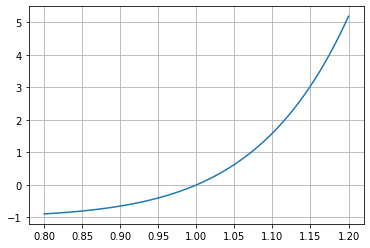

In [87]:
x = np.linspace(0.8, 1.2,10000)
plt.plot(x,f(x))
plt.grid(True)

##### Método da falsa posição

In [88]:
x_i = 0.8
x_u = 1.2
iteracoes = 200
tolerancia = 1e-10

valores = falsa_posicao(f, x_i, x_u, iteracoes, tolerancia)
valores[-1]

0.9999999999999998

##### Método do ponto fixo

In [89]:
g = lambda x: x ** 11

In [90]:
%timeit opt.fixed_point(g, 0.8, xtol=1e-10, maxiter=200)
opt.fixed_point(g, 0.8, xtol=1e-10, maxiter=200)

455 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(0.)

##### Método de Newton-Raphson

In [91]:
x = symbols('x')
derivada = diff(f(x))
f_1 = lambdify(x, derivada, 'numpy')
opt.root_scalar(f, fprime=f_1, x0=0.8, method='newton', maxiter=200, xtol=1e-10)

      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0

##### Método da secante

In [92]:
%timeit opt.root_scalar(f, x0=1.2, x1=0.8, xtol = 1e-10, maxiter=200, method='secant')
opt.root_scalar(f, x0=1.2, x1=0.8, xtol = 1e-10, maxiter=200, method='secant')

484 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 1.0